# Part II - Ford GoBike System Data Exploration
## by Emmanuel Udo

## Investigation Overview 

> This investigation, is aimed at looking into how the number of trips and trip duration is dependent on other features (especially, user type) from the dataset. I will be investigating:

> - Distribution of Trips across days of the week in the month of February, 2019
> - Distribution of Trips on hourly basis in the Month of February Year 2019
> - Distribution of Riders by Gender
> - Distribution of Riders by Age Bracket
> - Average trip duration across the week by user type


## Dataset Overview
> The Ford GoBiking System dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of February, 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load data and print out a few lines.
df = pd.read_csv('fordgobikesystemdata.csv')
# make a copy of the current dataset
df1 = df.copy()

In [3]:
# remove characters from the decimal point till end
df1['start_time'] = df1['start_time'].str[:19]
df1['end_time'] = df1['end_time'].str[:19]

In [4]:
# extract hour data part of the start_time column
df1['trip_start_hour'] = df1['start_time'].str[11:16]

# convert to datetime datatype with HH:00 AM/PM format
df1['trip_start_hour'] = pd.to_datetime(df1['trip_start_hour']).apply(lambda x: x.strftime("%I:00 %p"))

In [5]:
# change to datetime datatype
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time'] = pd.to_datetime(df1['end_time'])

In [6]:
# rename datetime columns appropriately
df1.rename(columns={'start_time':'start_datetime', 'end_time': 'end_datetime'}, inplace=True)

In [7]:
# extract start date and start time columns from start_datetime column
df1['start_date'] = df1['start_datetime'].dt.date
df1['start_time'] = df1['start_datetime'].dt.time

# extract end date and end time columns from end_datetime column
df1['end_date'] = df1['end_datetime'].dt.date
df1['end_time'] = df1['end_datetime'].dt.time

In [8]:
# rename duration_sec column to duration_in_seconds
df1.rename(columns={'duration_sec':'duration_in_seconds'}, inplace=True)

In [9]:
# calculate and create columns for duration in minutes and duration in hours respectively
df1['duration_in_minutes'] = df1['duration_in_seconds']/60
df1['duration_in_hours'] = df1['duration_in_seconds']/3600

# convert datatype from float to integer
df1[['duration_in_minutes', 'duration_in_hours']] = df1[['duration_in_minutes', 'duration_in_hours']].astype(int)

In [10]:
# drop columns
df1.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1, inplace=True)

In [11]:
# change datatype from object to datetime
df1['start_date'] = pd.to_datetime(df1['start_date'])
df1['end_date'] = pd.to_datetime(df1['end_date'])

# change datatype to float
df1['bike_id'] = df1['bike_id'].astype(str)

In [12]:
# extract day of the week from trip start day
df1['trip_start_day'] = df1['start_datetime'].dt.weekday_name

In [13]:
# reorder dataframe columns to make reading columns from left to right make logical sense
df1 = df1[['bike_id', 'user_type', 'member_birth_year', 'member_gender', 'trip_start_day', 'trip_start_hour', 'start_station_name', 'end_station_name', 'start_datetime', 'end_datetime', 'start_date', 'end_date', 'start_time', 'end_time',  'duration_in_seconds', 'duration_in_minutes', 'duration_in_hours']]

In [14]:
# write a for loop to assign serial numbers ranging from 0 to 6, to days of the week from Monday to Sunday
day_code = []
for d in df1['trip_start_day']:
    if d == 'Monday':
        day_code.append (0)
    elif d == 'Tuesday':
        day_code.append (1)
    elif d == 'Wednesday':
        day_code.append (2)
    elif d == 'Thursday':
        day_code.append (3)
    elif d == 'Friday':
        day_code.append (4)
    elif d == 'Saturday':
        day_code.append (5)
    elif d == 'Sunday':
        day_code.append (6)

# populate these codes in a new column in the dataframe
df1['Day_code'] = day_code

In [15]:
# create function to plot bar chart by taking two attributes and a title
def dist_bar(attrib1, attrib2, titled):
    # select two attributes from parent dataframe and save in an object variable
    day_count = df1[[attrib1, attrib2]]
    
    # create sorted object variables
    sorted = day_count.sort_values(by=[attrib2])
    sorted = sorted.reset_index(drop=True)
    sorted1 = sorted.groupby([attrib2, attrib1])[attrib1].size().reset_index(name='count')
    
    # set plot size
    plt.figure(figsize=(18,8))
    # make all bars the same colour
    base_color = sb.color_palette()[0]
    # make plot
    plots = sb.barplot(data=sorted1, x=attrib1, y='count', color=base_color)
    
    # text annotation
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
    # setting the label for x-axis
    plt.xlabel(attrib1, size=15)
    
    # setting the label for y-axis
    plt.ylabel('Number of Trips', size=15)
    # rotate x tick label
    plt.xticks(size=15, rotation=90)
    
    # setting graph title
    plt.title(titled)
    
    plt.show()

## Distribution of Trips across days of the week in the month of February, 2019
> Number of trips by riders is influenced by days of the week with most trips happening during the week days and fewer trips happening on weekends.

> Most of the trips were taken on Thursdays while Saturdays was the least

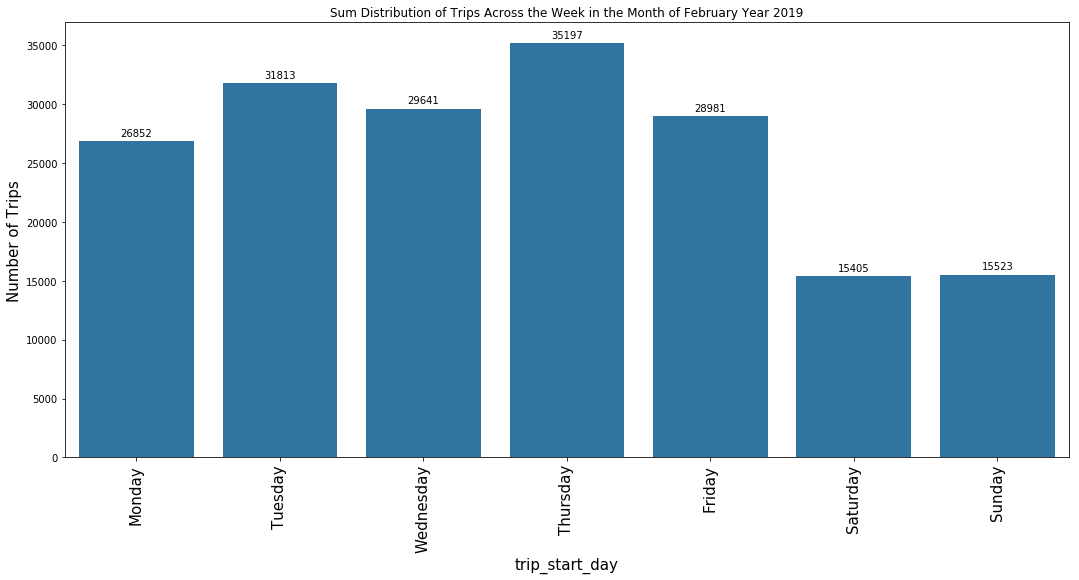

In [16]:
# call defined plot function
dist_bar('trip_start_day', 'Day_code', 'Sum Distribution of Trips Across the Week in the Month of February Year 2019')

In [17]:
# write a for loop to assign serial numbers ranging from 0 to 24, to the 24 hours of the day
hour_code = []
for h in df1['trip_start_hour']:
    if h == '12:00 AM':
        hour_code.append (0)
    elif h == '01:00 AM':
        hour_code.append (1)
    elif h == '02:00 AM':
        hour_code.append (2)
    elif h == '03:00 AM':
        hour_code.append (3)
    elif h == '04:00 AM':
        hour_code.append (4)
    elif h == '05:00 AM':
        hour_code.append (5)
    elif h == '06:00 AM':
        hour_code.append (6)
    elif h == '07:00 AM':
        hour_code.append (7)
    elif h == '08:00 AM':
        hour_code.append (8)
    elif h == '09:00 AM':
        hour_code.append (9)
    elif h == '10:00 AM':
        hour_code.append (10)
    elif h == '11:00 AM':
        hour_code.append (11)
    elif h == '12:00 PM':
        hour_code.append (12)
    elif h == '01:00 PM':
        hour_code.append (13)
    elif h == '02:00 PM':
        hour_code.append (14)
    elif h == '03:00 PM':
        hour_code.append (15)
    elif h == '04:00 PM':
        hour_code.append (16)
    elif h == '05:00 PM':
        hour_code.append (17)
    elif h == '06:00 PM':
        hour_code.append (18)
    elif h == '07:00 PM':
        hour_code.append (19)
    elif h == '08:00 PM':
        hour_code.append (20)
    elif h == '09:00 PM':
        hour_code.append (21)
    elif h == '10:00 PM':
        hour_code.append (22)
    elif h == '11:00 PM':
        hour_code.append (23)
    elif h == '12:00 PM':
        hour_code.append (24)

# populate these codes in a new column in the dataframe
df1['Hour_code'] = hour_code

## Distribution of Trips on hourly basis in the Month of February Year 2019

> 5:00 PM has the highest number of trips while 3:00 AM has the lowest number of trips

> The graph above shows that the number of riders starts very low very early in the morning (12:00 AM) and drops further till 3:00 AM when it is lowest. The number of riders starts increasing from 4:00 AM till 8:00 AM. There is a considerable drop between 9:00AM and 10:00 AM. There is a relatively constant number of riders between the hours of 10:00 AM through to 2:00 PM. Another rise in trips is seen from 3:00 PM to 5:00 PM when the number of trips rises to its peak at 21864 trips. And then finally, falls steadily till the midnight.

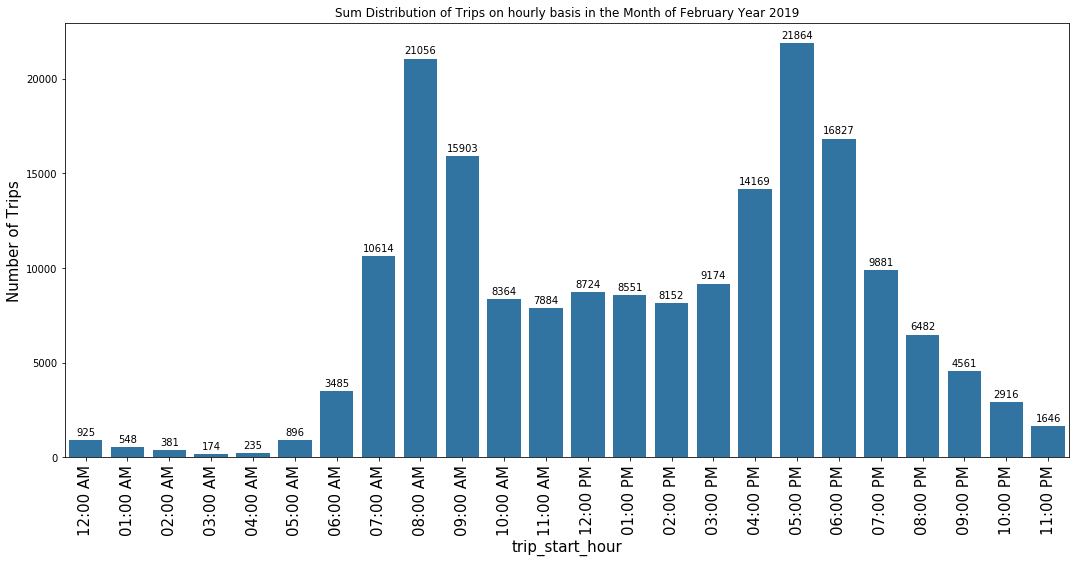

In [18]:
# use defined plot function
dist_bar('trip_start_hour', 'Hour_code', 'Sum Distribution of Trips on hourly basis in the Month of February Year 2019')

## Distribution of Riders by Gender

> Riders are mostly male, then female. A few riders identify themselves as neither male nor female.

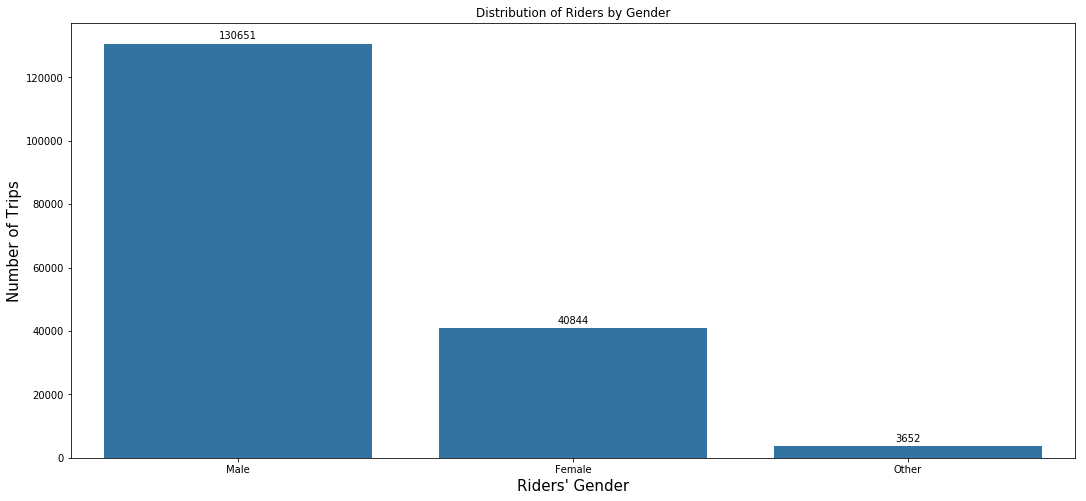

In [19]:
# create a dataframe of gender count
gender = df1['member_gender'].value_counts().rename_axis('member_gender').reset_index(name='counts')

# set plot size
plt.figure(figsize=(18,8))
# make all bars the same colour
base_color = sb.color_palette()[0]
# select dataset, x and y variable for the plot
plots = sb.barplot(data=gender, x='member_gender', y='counts', color=base_color)

# text annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
# setting the label for x-axis
plt.xlabel("Riders' Gender", size=15)

# setting the label for y-axis
plt.ylabel('Number of Trips', size=15)

# setting graph title
plt.title("Distribution of Riders by Gender")
    
plt.show()

In [20]:
# remove mising values
df2 = df1[df1['member_birth_year'].notna()]

# convert datatype from float to integer
df2['member_birth_year'] = df2['member_birth_year'].astype(int)

# calculate riders' age as an object variable
df2['member_age'] = 2019 - df2['member_birth_year']

In [21]:
# set bin edges and bin names to define categories of age
bin_edges = [13, 19, 29, 39, 49, 59, 69, 79, 141]
bin_names = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'too_old']

# populate the categories in a new column named age_class
df2['age_class'] = pd.cut(df2['member_age'], [13, 19, 29, 39, 49, 59, 69, 79, 141], labels=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'too_old'], include_lowest=True)

# create an object variable of age class
ageclass = df2['age_class'].value_counts().rename_axis('age_class').reset_index(name='counts')

## Distribution of Riders by Age Bracket

> Resulting chart shows that, only a few riders are in their teens. We see an increase of riders in their twenties, with highest (most) riders in their thirties. Then we see a very significant drop as the riders approach their thirties. There is a further general drop as the riders age further.

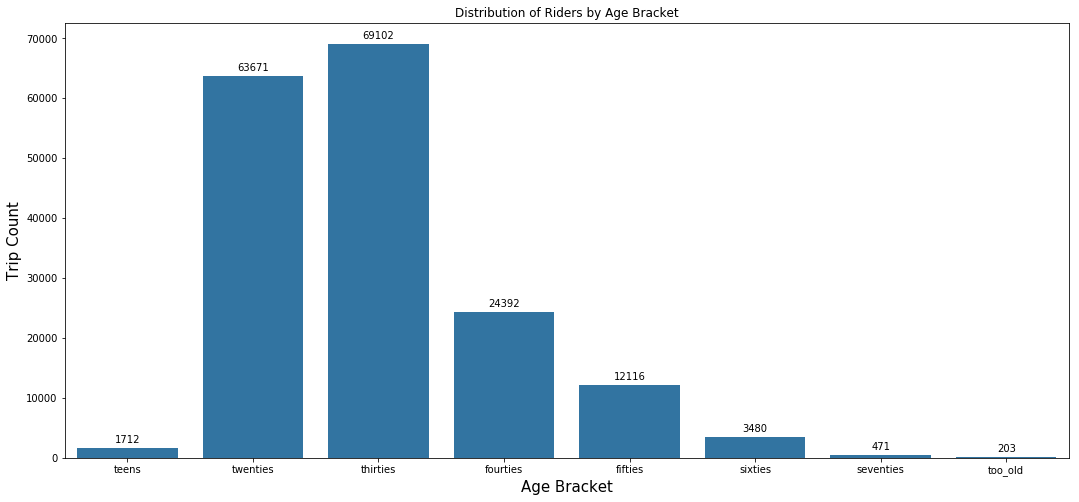

In [22]:
# set plot size
plt.figure(figsize=(18,8))
# make all bars the same colour
base_color = sb.color_palette()[0]
# select dataset, x and y axis variable
plots = sb.barplot(data=ageclass, x='age_class', y='counts', color=base_color)

# text annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')
        
# setting the label for x-axis
plt.xlabel("Age Bracket", size=15)

# setting the label for y-axis
plt.ylabel('Trip Count', size=15)

# setting graph title
plt.title("Distribution of Riders by Age Bracket")
    
plt.show()

## Average trip duration across the week by user type

> Charts above shows that customers has higher average trip duration across the week from Mondays through to Sundays, than subscribers.

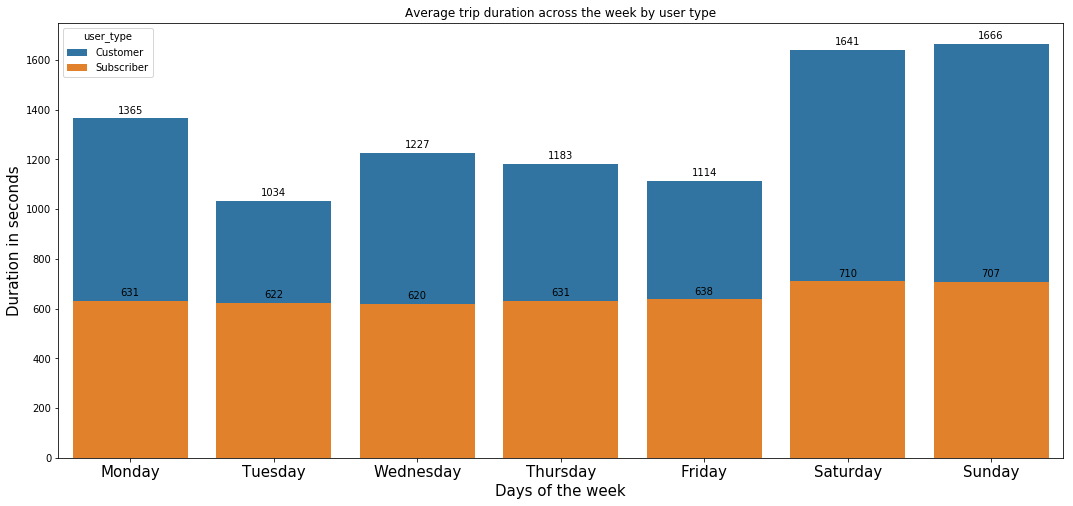

In [23]:
# create a dataframe showing the mean trip duration across days of the week for both user types
mean_usertype = df2.groupby(['Day_code', 'trip_start_day', 'user_type'], as_index=False)['duration_in_seconds'].mean()

# set plot size
plt.figure(figsize=(18,8))
# plot bar chart
plots = sb.barplot(x='trip_start_day', y='duration_in_seconds', hue='user_type', data=mean_usertype, dodge=False)

# text annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2, bar.get_height()), ha='center', va='center', size=10, xytext=(0,8), textcoords='offset points')

# setting the label for x-axis
plt.xlabel("Days of the week", size=15)
# x label
plt.xticks(size=15)

# setting the label for y-axis
plt.ylabel('Duration in seconds', size=15)

# setting graph title
plt.title('Average trip duration across the week by user type')
    
plt.show()

### Generate Slideshow
Use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 455067 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/